In [1]:
# This is the auxiliary code for the 3F8 coursework. Some parts are missing and
# should be completed by the student. These are Marked with XXX

# We load the data

import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

In [2]:
# We plot the data

import matplotlib.pyplot as plt

##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

plot_data(X, y)

<Figure size 640x480 with 1 Axes>

In [3]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))

##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))

##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# y: vector of binary output labels 
# w: vector of model parameters
#
# Output: The average loglikelihood
#

def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#

def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)

##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left) 
# y_train: vector of training binary output labels 
# X_tile_test: matrix of test input features (with a constant 1 appended to the left) 
# y_test: vector of test binary output labels 
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output: 
# 
# 1 - Vector of model parameters w 
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#

def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)

        diff_L_weights = X_tilde_train.transpose().dot(y_train - sigmoid_value)
        w = w + alpha * diff_L_weights# XXX Gradient-based update rule for w. To be completed by the student

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        #print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

In [43]:
# We train the classifier

alpha = 0.0005 # XXX Learning rate for gradient-based optimisation. To be completed by the student
n_steps = 200 # XXX Number of steps of gradient-based optimisation. To be completed by the student

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)
print(sum(ll_train)/len(ll_train))
print(sum(ll_test)/len(ll_test))


-0.6241284663348994
-0.6561823266615854


In [44]:
# apply a threshold to test data and obtain the confusion matrix
# positive_test = ll_test(ll_test > 0.5)
# negative_test = ll_test(ll_test <= 0.5)

print(len(y_test))
print(len(ll_test))

threshold = np.log(0.5)
print(threshold)

def confusion_calculation(ll_test, y_test):
    # predicted label then true label
    zero_zero = 0
    zero_one = 0
    one_zero = 0
    one_one = 0
    for i in range(len(y_test)):
        if ll_test[i] <= threshold and y_test[i] == 0.0:
            zero_zero += 1
        elif ll_test[i] > threshold and y_test[i] == 0.0:
            one_zero += 1
        elif ll_test[i] <= threshold and y_test[i] == 1.0:
            zero_one += 1
        elif ll_test[i] > threshold and y_test[i] == 1.0:
            one_one += 1
    print(zero_zero, one_zero, zero_one, one_one)
    print(zero_zero/(zero_zero+one_zero), one_zero/(zero_zero+one_zero), zero_one/(zero_one+one_one),  one_one/(zero_one+one_one))
    return zero_zero/(zero_zero+one_zero), one_zero/(zero_zero+one_zero), zero_one/(zero_one+one_one),  one_one/(zero_one+one_one)


confusion_calculation(ll_test, y_test)

200
200
-0.6931471805599453
5 96 8 91
0.04950495049504951 0.9504950495049505 0.08080808080808081 0.9191919191919192


(0.04950495049504951,
 0.9504950495049505,
 0.08080808080808081,
 0.9191919191919192)

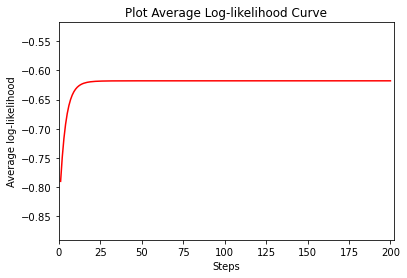

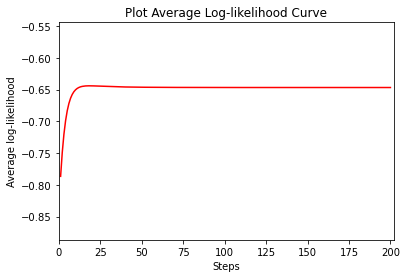

In [6]:
##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()

# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)


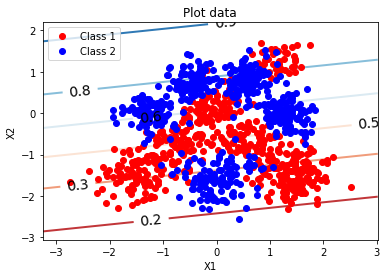

In [7]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

# We plot the predictive distribution

plot_predictive_distribution(X, y, w)

In [65]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

# We expand the data

l = 0.1 # XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# We train the new classifier on the feature expanded inputs

alpha = 0.0004# XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student
n_steps = 4000 # XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)


In [66]:
print(sum(ll_train)/len(ll_train))
print(sum(ll_test)/len(ll_test))
confusion_calculation(ll_test, y_test)

-0.25699729937436594
-0.358319145486806
44 57 35 64
0.43564356435643564 0.5643564356435643 0.35353535353535354 0.6464646464646465


(0.43564356435643564,
 0.5643564356435643,
 0.35353535353535354,
 0.6464646464646465)

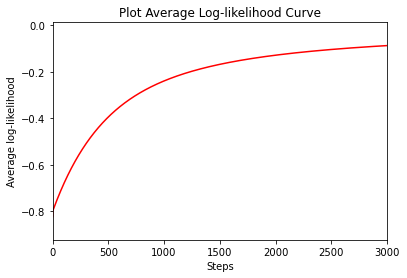

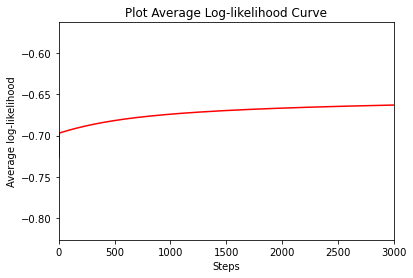

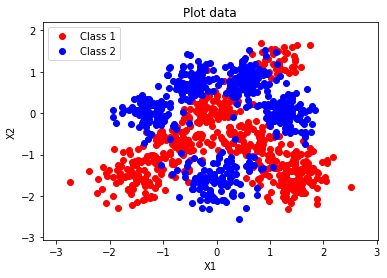

In [52]:
# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))
